# Setup: Installing Required Libraries
This cell installs the main Python packages used for generative AI tasks in this notebook:
- **torch**: Deep learning framework
- **diffusers**: Library for diffusion models (image generation)
- **genaibook**: Utilities from the book
- **transformers**: Hugging Face library for transformer models

In [ ]:
!pip install torch
!pip install diffusers
!pip install genaibook
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5

## Generating Images -- Diffusion Model
This section demonstrates how to generate images using a diffusion model. Diffusion models iteratively transform random noise into a coherent image, guided by a prompt. We'll use the Stable Diffusion model from Hugging Face's `diffusers` library.

In [ ]:
from genaibook.core import get_device
device = get_device()
print(f"Using device: {device}")

Using device: cuda


### Load Stable Diffusion Pipeline
Here, we load the Stable Diffusion model and move it to the selected device (CPU or GPU). The model will generate an image based on a text prompt.

2025-08-13 19:47:29.479430: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755114449.684596      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755114449.743873      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

safety_checker/model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/1.72G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

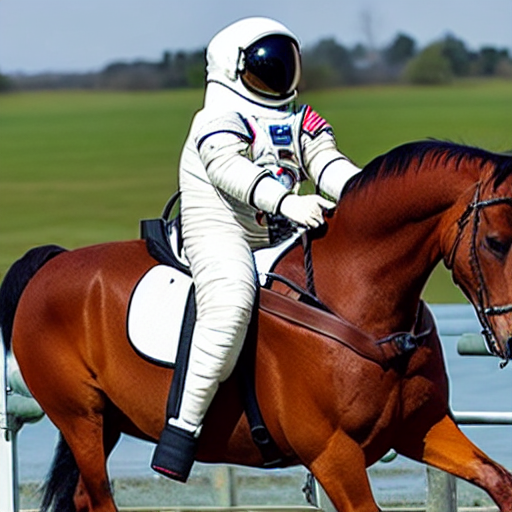

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    variant="fp16",
    ).to(device)

prompt = "a photograph of an astronaut riding a horse"
pipe(prompt).images[0]

## Generating Text
This section uses transformer models for text classification and text generation. Transformers are deep learning models that excel at understanding and generating natural language.

In [ ]:
from transformers import pipeline

classifier = pipeline("text-classification", device=device)
classifier("This movie is disgustingly good!")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


[{'label': 'POSITIVE', 'score': 0.9998536109924316}]

### Text Generation with Transformers
Here, we use a text generation pipeline to create new text based on a prompt. Setting a seed ensures reproducibility.

In [ ]:
from transformers import set_seed

# Setting the seed ensures we get the same results every time we run this code
set_seed(10)

generator = pipeline("text-generation", device=device)
prompt = "It was a dark and stormy"
generator(prompt)[0]["generated_text"]

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'It was a dark and stormy morning, and my mind went blank.\n\nWalking, I met someone. He looked up at me, like we were in a movie. He didn\'t say a word. He said, "This is your friend. He\'s a member of the group. He\'s not a monster. He\'s not afraid. He doesn\'t have his hands on you, and he doesn\'t have his feet on you, and he doesn\'t have his back to you. He doesn\'t have his voice against you, and he doesn\'t have your thoughts against you."\n\nMy eyes went wide and my eyelids shut. I knew he was there, as was my sister. I saw him with my hands in his. It was a sad moment. I looked up to see what was going on. He was standing on the ground, his head buried in my lap, his face as cold and his eyes as cold and I saw him. He looked confused, as if he never knew what was going to happen. I looked to my left, to my right, to my right.\n\nI didn\'t know what to do. I didn\'t know what to do. I didn\'t know what to do. I didn\'t know what to do. I didn\'t know'

### Display Generated Text
Print the generated text from the previous cell.

In [6]:
print(generator(prompt)[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


It was a dark and stormy night and the sky was bright, and I saw the sun rise, and the sea come down, and the sea lay flat. And I said, "O God, why do you come into the world, and see what a world it is, and what a world it is not?" And he said, "By the Spirit of God, I believe that God exists, and that He lives on earth; and I will give Him life, and He will give His life to every living creature, and He will give it life to all things that come into His sight. And I will make His flesh and His blood and His blood to go forth in my name, and I will be His Spirit."

I went into the house and saw that I was the only one among all the men who had the power of speaking. And I said, "O God, what a world it is, and what a world it is not!" And he said, "They say that the Lord was in the world to reveal it to the world, not for the world, but to the men and women of the world, and they say that the Lord is in the world to reveal it to the men and women of the world, and it is written, "I hav

## Generating Sound Clips
This section uses a transformer-based model to generate audio clips from text prompts. MusicGen is a model that creates music based on textual descriptions.

In [ ]:
pipe = pipeline("text-to-audio", model="facebook/musicgen-small", device=device)
data = pipe("electric rock solo, very intense")
print(data)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/2.36G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cuda
`torch.nn.functional.scaled_dot_product_attention` does not support having an empty attention mask. Falling back to the manual attention implementation. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.Note that this probably happens because `guidance_scale>1` or because you used `get_unconditional_inputs`. See https://github.com/huggingface/transformers/issues/31189 for more information.


{'audio': array([[[ 0.10466561,  0.10433939,  0.12222057, ..., -0.00211407,
         -0.00226485, -0.00347228]]], dtype=float32), 'sampling_rate': 32000}


### Play Generated Audio
Use IPython's audio display to play the generated sound clip.

In [ ]:
import IPython.display as ipd

display(ipd.Audio(data["audio"][0], rate=data["sampling_rate"]))